In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from scipy import stats
import statsmodels.api as sm


import acquire as a
import prepare as p


### Acquire both datasets (store and opsd):

In [2]:
store = a.get_all()

Using cached data
Using cached data
Using cached data


In [3]:
opsd = a.get_opsd()

Reading from .csv


In [4]:
store.head(2)

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [5]:
opsd.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


### Prepare both datasets (store and opsd):

In [6]:
store = p.prep_store(store)

In [7]:
opsd = p.prep_opsd(opsd)

In [8]:
store.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,Tuesday,218.40


In [9]:
opsd.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


### Split Store Data:

In [10]:
# Percentage-Based
# train_size = .70
# n = store.shape[0]
# test_start_index = round(train_size * n)

# train = store[:test_start_index] # everything up (not including) to the test_start_index
# test = store[test_start_index:] # everything from the test_start_index to the end


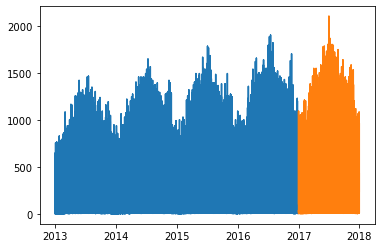

In [11]:
# Human-Based
train = store.loc[:'2016'] # includes 2016
test = store.loc['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

### Explore store data

#### 1.) Blow off the time series

<AxesSubplot:ylabel='Frequency'>

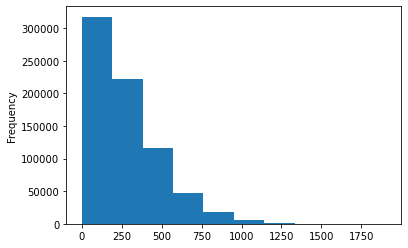

In [12]:
train.sales_total.plot.hist()


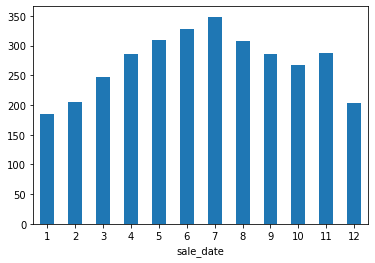

In [13]:
ax = train.groupby(train.index.month).sales_total.mean().plot.bar()
ax.tick_params('x', rotation=0)
plt.show()

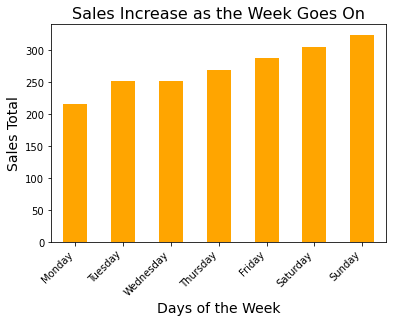

<Figure size 936x432 with 0 Axes>

In [14]:
train['weekday'] = train.index.day_name()
train.weekday = pd.Categorical(train.weekday, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
train.groupby('weekday').sales_total.mean().plot.bar(color = 'orange')
plt.xlabel('Days of the Week', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Sales Total', fontsize = 14)
plt.title('Sales Increase as the Week Goes On', fontsize = 16)
plt.figure(figsize=(13, 6), facecolor='black')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

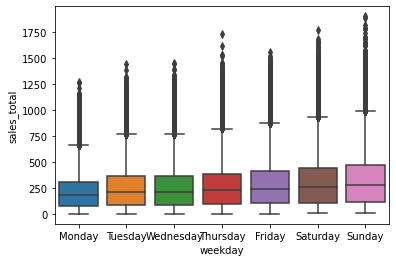

In [15]:
sns.boxplot(data=train, y='sales_total', x='weekday')


#### 2.) y over time

In [16]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

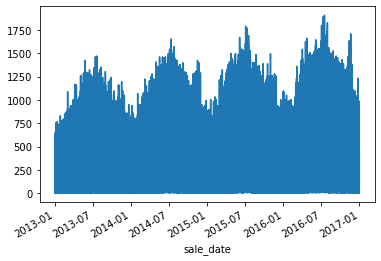

In [17]:
y.plot()

#### 3.) y averaged over various periods of time

In [18]:
def time_plots(df):  
    # y.plot(alpha=.2, label='Hourly')
    df.resample('D').mean().plot(alpha=.2, label='Daily')
    df.resample('W').mean().plot(alpha=.35, label='Weekly')
    df.resample('M').mean().plot(alpha=.5, label='Montly')
    df.resample('Q').mean().plot(alpha=.65, label='Quarterly')
    df.resample('Y').mean().plot(alpha=.8, label='Yearly')
    plt.legend(bbox_to_anchor= (1,1))
    return

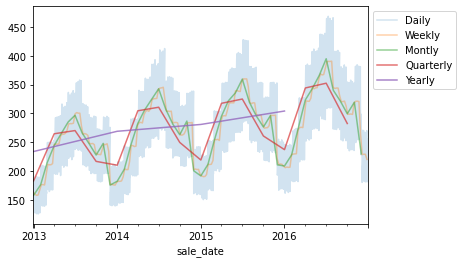

In [19]:
time_plots(y)

#### 4.) Change in y over time

In [20]:
def y_over_time(df):   
    df.resample('2W').mean().diff().plot()
    return

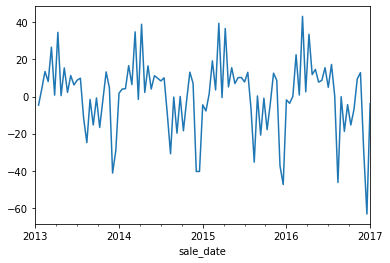

In [21]:
y_over_time(y)

[Text(0.5, 1.0, 'Total Sale Over Time')]

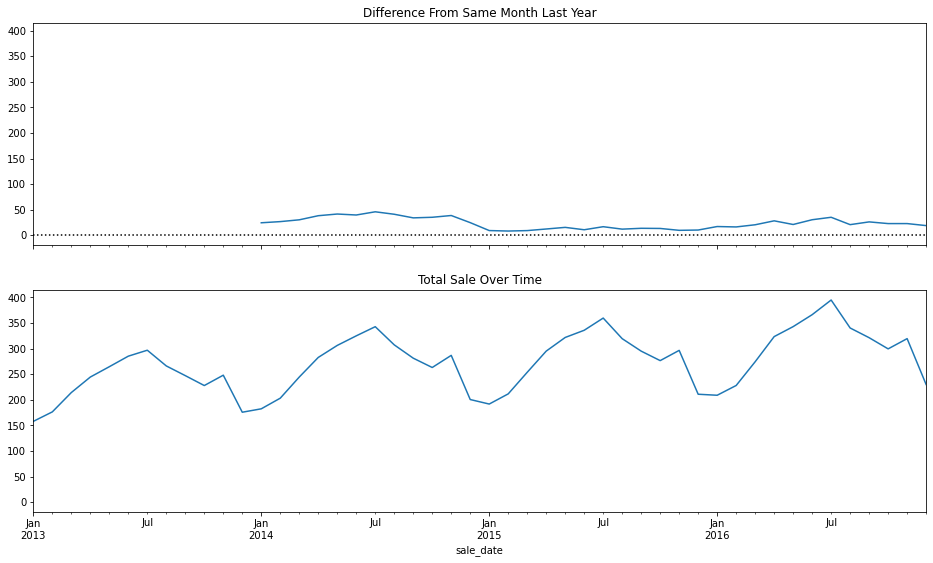

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(16, 9))

ax1 = y.resample('M').mean().diff(12).plot(ax=ax1)
# ax1.set_ylim(-10, 60)
ax1.hlines(0, *ax1.get_xlim(), color='black', ls=':')
ax1.set(title='Difference From Same Month Last Year')

ax2 =y.resample('M').mean().plot(ax=ax2)
# ax2.set_ylim(-10, 450)
ax2.set(title='Total Sale Over Time')

#### 5.) Seasonal Plot

In [23]:
def seasonal_plot(df):
    # .unstack turns an index level into columns
    df.groupby([df.index.year, df.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
    return

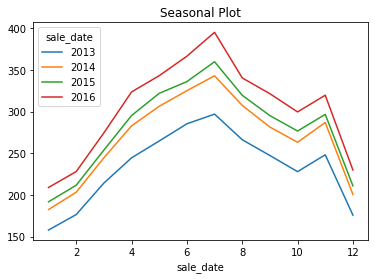

In [24]:
seasonal_plot(y)

### Split OPSD data:

In [25]:
# Percentage-Based
train_size = .70
n = opsd.shape[0]
test_start_index = round(train_size * n)

train = opsd[:test_start_index] # everything up (not including) to the test_start_index
test = opsd[test_start_index:] # everything from the test_start_index to the end


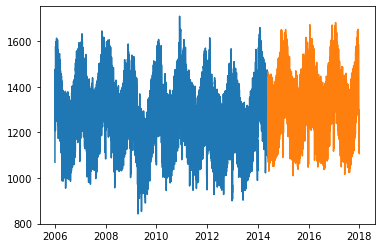

In [26]:
# # Human-Based
# train = store.loc[:'2016'] # includes 2016
# test = store.loc['2017']

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

### Explore OPSD data:

In [27]:
y = train.consumption
y.head()

date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: consumption, dtype: float64

#### 6.) Seasonal Subseries plot

In [28]:
# Make into a table
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1340.952769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
for month_number, subset in table.iteritems():
    print(month_number)

1
2
3
4
5
6
7
8
9
10
11
12


In [30]:
ax.get_xlim()


(-0.5, 11.5)

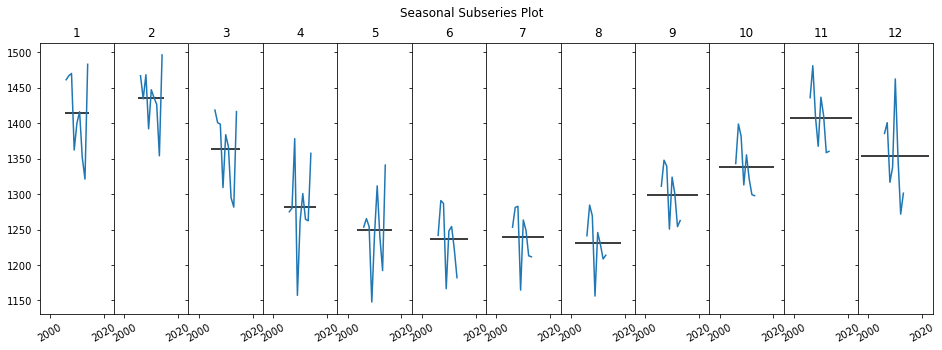

In [31]:
# Use previous table 
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
# Set subplots for each month
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='-')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### 7.) Lag Plot

In [32]:
# Create new column for y(t+1) or the NEXT DAY'S comsumption
train['y(t + 1)'] = train.consumption.shift(-1)
train.head()

,consumption,wind,solar,wind_solar,month,year,y(t + 1)
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,1380.521
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,1442.533
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,1457.217
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,1477.131
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,1403.427


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

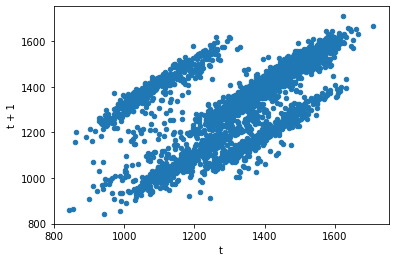

In [33]:
# Create a scatter plot to show consumption on it's linear path over time
ax = train.plot.scatter(x='consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

,this_week,wind,solar,wind_solar,year,the_next_week
date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,2014.0,1372.166000
2014-05-11,1372.166000,204.100143,124.597143,328.697286,2014.0,1372.636143
2014-05-18,1372.636143,117.518286,131.462000,248.980286,2014.0,1357.924714


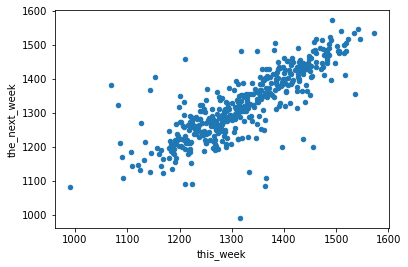

In [34]:
# Create new column for y(t+1) or the NEXT WEEK'S comsumption
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.consumption.shift(-1)
# Rename the column as this_week's consumption 
weekly = weekly.rename(columns={'consumption': 'this_week'})
# Create the scatter plot showing the change over time
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

#### 8.) Autocorrelation Plot

In [35]:
train.head()

,consumption,wind,solar,wind_solar,month,year,y(t + 1)
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,1380.521
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,1442.533
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,1457.217
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,1477.131
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,1403.427


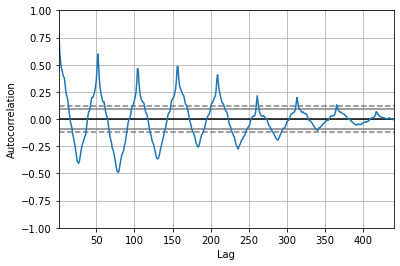

In [40]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())
plt.show()

#### 9.) Seasonal Decomposition

<AxesSubplot:xlabel='date'>

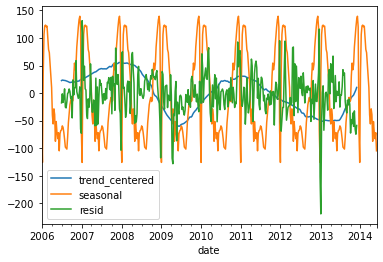

In [42]:
y = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot()

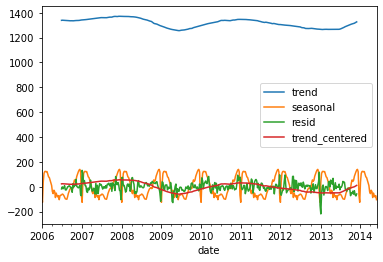

In [44]:
decomposition.iloc[:,1:].plot()
plt.show()

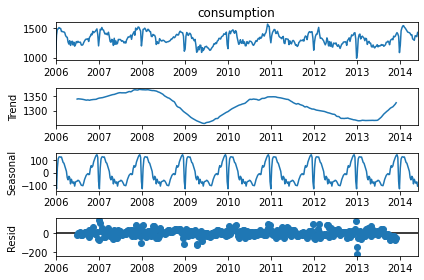

In [46]:
result.plot()
plt.show()

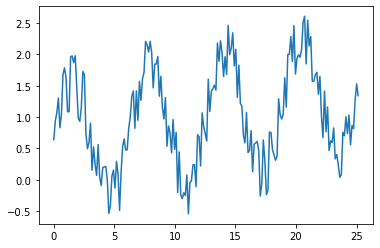

In [47]:
# Simulation Demo

x = np.linspace(0, 8 * np.pi, 200)
seasonal = np.sin(x)
trend = np.linspace(0, 1, 200)
resid = np.random.rand(200)

y = seasonal + trend + resid

plt.plot(x, y)

#### Area Plots

In [48]:
train = train.drop(columns='y(t + 1)')

In [49]:
train = train.resample('D').mean()

In [50]:
train['consumption_bin'] = pd.qcut(train.consumption, 3, labels=['low', 'mid', 'high'])

In [51]:
train.groupby('consumption_bin').resample('M').size().unstack(-1)

date        consumption_bin
2006-01-31  low                 5
            mid                 6
            high               20
2006-02-28  low                 4
            mid                 4
                               ..
2014-04-30  mid                 0
            high               20
2014-05-31  low                 9
            mid                 1
            high               16
Length: 303, dtype: int64

In [56]:
train.groupby('consumption_bin').mean()


,consumption,wind,solar,wind_solar,year
consumption_bin,,,,,
low,1125.874587,65.577156,26.331001,69.319043,2009.879765
mid,1345.901834,59.831141,29.165084,65.998640,2009.715264
high,1493.085339,66.784214,13.010112,46.922207,2009.548387


In [54]:
table = train.groupby('consumption_bin').resample('M').size().unstack(0)
table.apply(lambda row : row / row.sum(), axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [ ]:
# ax = (train.groupby('consumption_bin')
#      .resample('M')
#      .size()
#      .unstack(0)
#      .apply(lambda row: row / row.sum(), axis=1)
#      .plot.area(title='Consumption Bin Over Time', ylabel='% of the Month'))
# ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
# ax.yaxis.set_major_formatter('{:.0%}'.format)